In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
import cv2
import util
import palm_subtraction as PS

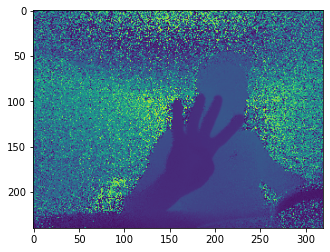

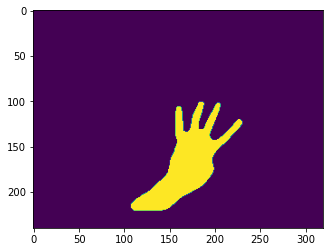

In [57]:
# file = "data/acquisitions/S2/G1/2-color.png"
file = "data/acquisitions/S1/G8/26-color.png"
# file = 'data/acquisitions/S4/G5/22-color.png'
# file = r'.\data\acquisitions\S1\G1\23-color.png'
# file = r'.\data\acquisitions\S1\G1\24-color.png'
# file = r'.\data\acquisitions\S4\G6\30-color.png'
label = '5'
train_image = cv2.imread(file, cv2.IMREAD_COLOR)

depth_img = util.read_depth_map(file[:-9] + 'depth.bin')

# Clean depth image of noise
bin_img = PS.clean_image(depth_img)
plt.figure(1)
plt.imshow(depth_img)
plt.figure(2)
plt.imshow(bin_img)
plt.show()

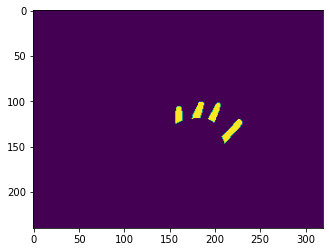

In [58]:
img = PS.palm_subtraction(bin_img)
plt.imshow(img)

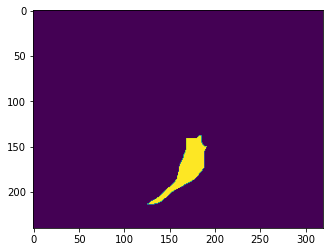

In [59]:
kernel = np.ones((15,20), dtype = 'uint8')
# image_dilate = cv2.dilate(bin_img, kernel)  
image_erode = cv2.erode(bin_img, kernel)  
plt.imshow(image_erode)

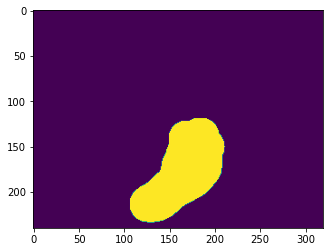

In [60]:
kernel = np.ones((25,25), dtype = 'uint8')
image_blur = gaussian_filter(image_erode, 3)
kernel = np.zeros((40, 40, 3), dtype='uint8')
kernel = cv2.circle(kernel, (20, 20), 20, (255, 255, 255), -1)
image_dilate = cv2.dilate(image_erode, kernel[:,:,1])  
# image_erode = cv2.erode(bin_img, kernel)  
plt.imshow(image_dilate)

# polylines attempt

In [61]:
import p1n2 as hw

def convert2imgcoords(x, y, slope, num_row, scale=9999):
    p1, p2 = (x, num_row - y), (x - scale, int(-scale * (-slope) + num_row - y))
    if p2[0]*p2[1] > 0:
        p1, p2 = (x, num_row - y),(x + scale, int(scale * (-slope) + num_row - y))
    return p1, p2


def wrist_subtraction(palm_img, radius=30, display=False):
    img = palm_img.copy()
    attribute_list = hw.get_attribute(img/255)
    h, w = img.shape
    p1, p2 = convert2imgcoords(int((attribute_list[0]["position"]["x"])),
                           int((attribute_list[0]["position"]["y"])),
                           np.tan(attribute_list[0]["orientation"]), h)
    p1 = (p1[0] + radius, p1[1])
    p3 = (0, p1[1])
    print(p1, p2, p3)
    corners = np.array([np.array(p1), np.array(p2), np.array(p3)])

    return_img = cv2.fillPoly(img,[np.int32(corners)], 255)
    if display is True:        
        display_image = cv2.circle(return_img.copy(), p1, 2, 155, 2)
        plt.imshow(display_image)
    
    return return_img

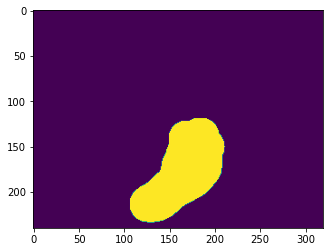

In [62]:
plt.imshow(image_dilate)

(193, 178) (-9836, 13301) (0, 178)


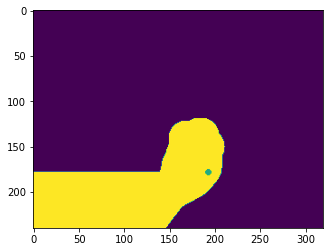

(193, 178) (-9836, 13301) (0, 178)


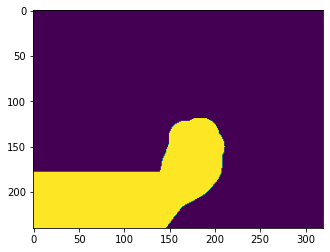

In [63]:
wrist_subtraction(image_dilate, display=True)
plt.show()
plt.imshow(wrist_subtraction(image_dilate, display=False))

(193, 178) (-9836, 13301) (0, 178)
(193, 178) (-9836, 13301) (0, 178)


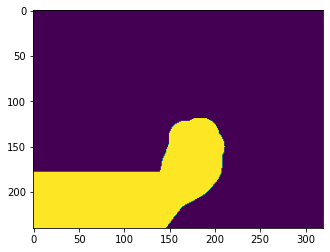

In [64]:
negative_img = wrist_subtraction(image_dilate, display=False)
plt.show()
plt.imshow(wrist_subtraction(image_dilate, display=False))

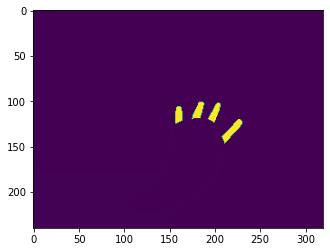

In [65]:
fingies = bin_img - negative_img
plt.imshow(fingies)

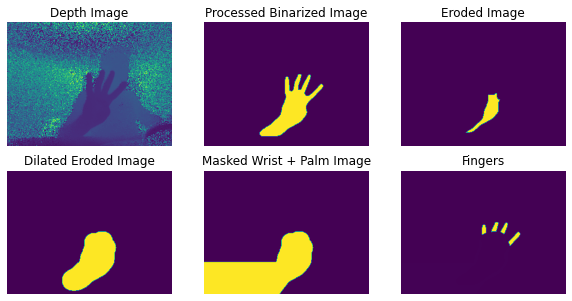

In [76]:
f, axarr = plt.subplots(2, 3)
f.set_figheight(5)
f.set_figwidth(10)

axarr[0,0].imshow(depth_img)
axarr[0,0].set_title("Depth Image")
axarr[0,0].axis('off')

axarr[0,1].imshow(bin_img)
axarr[0,1].set_title("Processed Binarized Image")
axarr[0,1].axis('off')

axarr[0,2].imshow(image_erode)
axarr[0,2].set_title("Eroded Image")
axarr[0,2].axis('off')

axarr[1,0].imshow(image_dilate)
axarr[1,0].set_title("Dilated Eroded Image")
axarr[1,0].axis('off')

axarr[1,1].imshow(negative_img)
axarr[1,1].set_title("Masked Wrist + Palm Image")
axarr[1,1].axis('off')

axarr[1,2].imshow(fingies)
axarr[1,2].set_title("Fingers")
axarr[1,2].axis('off')

plt.show()
